In [10]:
# Umesh Dhakal  
## MSCS634L3  
## Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import pairwise_distances



In [12]:
# loading wine dataset
wine_data = load_wine()

x_data = wine_data.data
y_label = wine_data.target
col_name = wine_data.feature_names

wine_df = pd.DataFrame(x_data, columns=col_name)
wine_df["real_class"] = y_label

print("Data shape:", x_data.shape)
print(wine_df["real_class"].value_counts().sort_index())



Data shape: (178, 13)
real_class
0    59
1    71
2    48
Name: count, dtype: int64


In [13]:
# standardize feature values using z-score
scale_tool = StandardScaler()
x_scaled = scale_tool.fit_transform(x_data)


In [14]:
# runing k-means clustering with k = 3
k_val = 3

kmeans_model = KMeans(n_clusters=k_val, random_state=42, n_init=10)
kmeans_label = kmeans_model.fit_predict(x_scaled)

kmeans_sil = silhouette_score(x_scaled, kmeans_label)
kmeans_ari = adjusted_rand_score(y_label, kmeans_label)

print("K-Means Silhouette:", round(kmeans_sil, 4))
print("K-Means ARI:", round(kmeans_ari, 4))


K-Means Silhouette: 0.2849
K-Means ARI: 0.8975


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
#  Implementation of k-medoids
def k_medoids(x_data, k, max_iter=100):
    np.random.seed(42)
    medoid_idx = np.random.choice(len(x_data), k, replace=False)

    for _ in range(max_iter):
        dist_mat = pairwise_distances(x_data, x_data[medoid_idx])
        cluster_label = np.argmin(dist_mat, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_point = x_data[cluster_label == i]

            if len(cluster_point) == 0:
                new_medoids.append(medoid_idx[i])
                continue

            inner_dist = pairwise_distances(cluster_point, cluster_point)
            total_dist = inner_dist.sum(axis=1)
            best_point = cluster_point[np.argmin(total_dist)]

            idx = np.where((x_data == best_point).all(axis=1))[0][0]
            new_medoids.append(idx)

        new_medoids = np.array(new_medoids)
        if np.array_equal(medoid_idx, new_medoids):
            break

        medoid_idx = new_medoids

    return cluster_label, medoid_idx


In [16]:
# applying k-medoids
kmed_label, medoid_idx = k_medoids(x_scaled, k_val)

kmed_sil = silhouette_score(x_scaled, kmed_label)
kmed_ari = adjusted_rand_score(y_label, kmed_label)

print("K-Medoids Silhouette:", round(kmed_sil, 4))
print("K-Medoids ARI:", round(kmed_ari, 4))


K-Medoids Silhouette: 0.1548
K-Medoids ARI: 0.3413


C:\Users\umesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


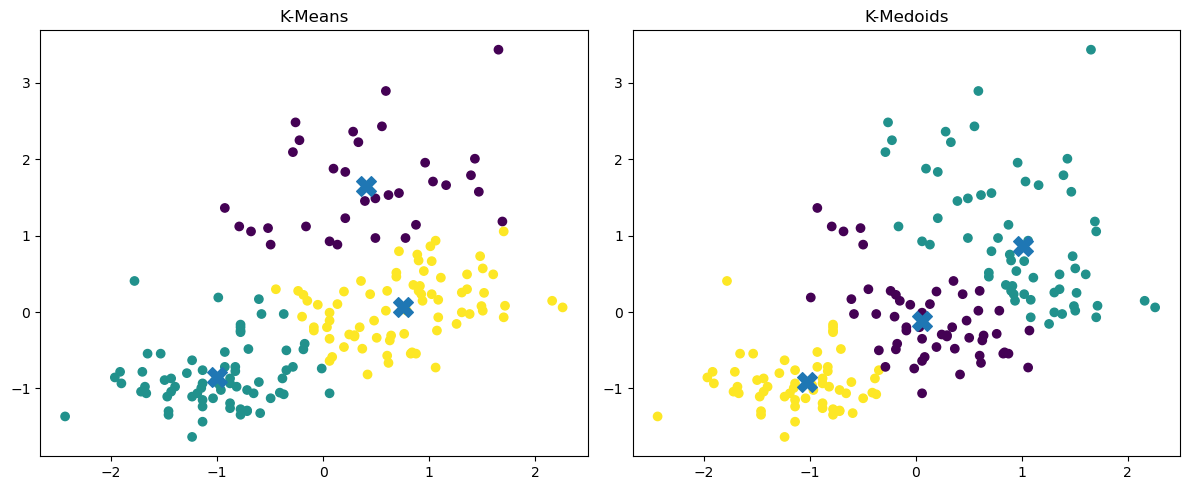

In [17]:
# visualizing k-means and k-medoids clusters
feat_a = "alcohol"
feat_b = "color_intensity"

a_idx = col_name.index(feat_a)
b_idx = col_name.index(feat_b)

x_plot = x_scaled[:, [a_idx, b_idx]]

kmeans_2d = KMeans(n_clusters=k_val, random_state=42, n_init=10)
kmeans_2d_label = kmeans_2d.fit_predict(x_plot)
kmeans_center = kmeans_2d.cluster_centers_

kmed_2d_label, medoid_idx_2d = k_medoids(x_plot, k_val)
medoid_point = x_plot[medoid_idx_2d]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x_plot[:,0], x_plot[:,1], c=kmeans_2d_label)
plt.scatter(kmeans_center[:,0], kmeans_center[:,1], marker="X", s=200)
plt.title("K-Means")

plt.subplot(1,2,2)
plt.scatter(x_plot[:,0], x_plot[:,1], c=kmed_2d_label)
plt.scatter(medoid_point[:,0], medoid_point[:,1], marker="X", s=200)
plt.title("K-Medoids")

plt.tight_layout()
plt.show()
